Dataset Preview:
   CustomerID  Age  Annual_Income(k$)  Spending_Score(1-100)
0           1   19                 15                     39
1           2   35                 53                     81
2           3   26                 78                      6
3           4   27                 99                     77
4           5   19                 15                     40

Clustered Data:
   CustomerID  Age  Annual_Income(k$)  Spending_Score(1-100)  Cluster
0           1   19                 15                     39        0
1           2   35                 53                     81        1
2           3   26                 78                      6        0
3           4   27                 99                     77        1
4           5   19                 15                     40        0
5           6   27                 40                     76        1
6           7   27                 42                     94        1
7           8   32                 70   

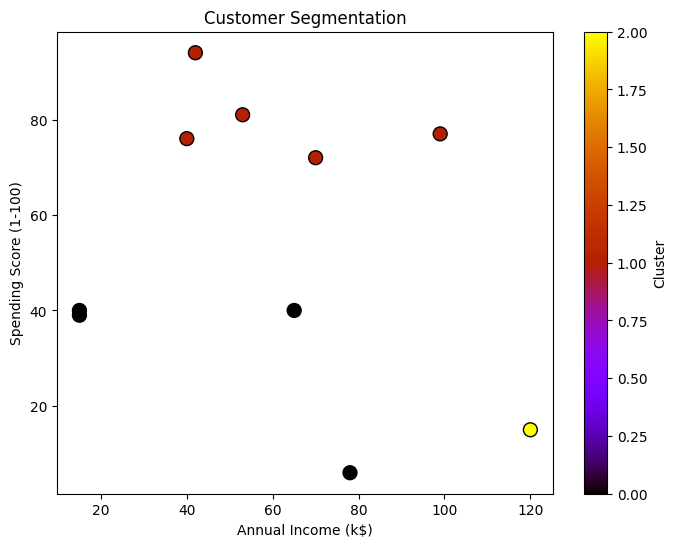

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Sample dataset (for Demo purpose)
data = {
    'CustomerID': range (1, 11),
    'Age': [19, 35, 26, 27, 19, 27, 27, 32, 25, 40],
    'Annual_Income(k$)': [15, 53, 78, 99, 15, 40, 42, 70, 65, 120],
    'Spending_Score(1-100)': [39, 81, 6, 77, 40, 76, 94, 72, 40, 15]
}
df = pd.DataFrame(data)

print("Dataset Preview:")
print(df.head())

#Features for clustering
X = df[['Age', 'Annual_Income(k$)', 'Spending_Score(1-100)']]

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nClustered Data:")
print(df)

#Plot results
plt.figure(figsize = (8, 6))
plt.scatter(df['Annual_Income(k$)'], df['Spending_Score(1-100)'],
            c = df['Cluster'], cmap = 'gnuplot', s = 100, edgecolor = 'k')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('Customer Segmentation')
plt.colorbar(label = 'Cluster')
plt.show()